In [252]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [253]:
#import the csv file we have saved after web scraping from the Craiglist website
df_york = pd.read_csv("data/web_scrap_craiglist_data_newyork_final.csv", index_col = 0)
df_philly = pd.read_csv("data/web_scrap_craiglist_data_philly_final.csv", index_col = 0)

In [254]:
df_philly.head(3)

,Unnamed: 0.1,post_title_texts,post_prices,sqfts,post_links,bedroom_counts,post_hoods,post_timing,No_of_bathrooms,No_of_bedrooms,latitude,longitude,pet,laundry,parking,floor,Apartment_type,smoking
0,0,👉 Experience The Virtual Tours at The Piazza,3045,1002.0,https://philadelphia.craigslist.org/apa/d/phil...,2.0,(1050 N Hancock St - Northern Liberties),2021-02-18 17:22,2Ba,2BR,39.969515,-75.139578,both pets,in unit,no,NaN,multi,NaN
1,1,Spacious 1 bedroom apartment,1000,NaN,https://philadelphia.craigslist.org/apa/d/phil...,1.0,(South Philadelphia),2021-02-18 17:19,1Ba,1BR,39.920700,-75.159500,no pet,in unit,off-street,wood,multi,NaN
2,2,"Stainless GE Appliances, Wood Floors, Rooftop ...",2487,NaN,https://philadelphia.craigslist.org/apa/d/phil...,1.0,(Philadelphia),2021-02-18 17:19,1Ba,1BR,39.959700,-75.202400,no pet,in unit,no,NaN,multi,NaN


# Take care of count of Bathrooms and Bedrooms

In [255]:
df_philly['No_of_bathrooms'].value_counts()

 1Ba        1702
 2Ba         495
 1.5Ba       101
 3Ba          71
 2.5Ba        70
 4Ba          10
 4.5Ba         1
 5Ba           1
 3.5Ba         1
 splitBa       1
Name: No_of_bathrooms, dtype: int64

In [256]:
df_philly['No_of_bedrooms'].value_counts()

1BR     1019
2BR      864
3BR      272
0BR      241
4BR       38
5BR       19
Name: No_of_bedrooms, dtype: int64

#### We find the sharedBa and 0 Ba listings.

In [257]:
#Why we not able to see any listings for 1.5Ba ?
df_york[df_york['No_of_bathrooms'] == '1.5Ba']

,Unnamed: 0.1,post_title_texts,post_prices,sqfts,post_links,bedroom_counts,post_hoods,post_timing,No_of_bathrooms,No_of_bedrooms,latitude,longitude,pet,laundry,parking,floor,Apartment_type,smoking


In [258]:
# We found the space in front so first we want to remove the space
df_york['No_of_bathrooms'].str.split(',')

0       [ 1.5Ba]
1         [ 1Ba]
2         [ 1Ba]
3       [ 1.5Ba]
4         [ 1Ba]
          ...   
2921      [ 1Ba]
2922      [ 1Ba]
2923      [ 1Ba]
2924      [ 1Ba]
2925      [ 1Ba]
Name: No_of_bathrooms, Length: 2926, dtype: object

In [259]:
#Replace the space by empty
df_york['No_of_bathrooms'] = df_york['No_of_bathrooms'].str.replace(' ', '')
df_philly['No_of_bathrooms'] = df_philly['No_of_bathrooms'].str.replace(' ', '')

In [260]:
# There is sharedBa let's check the post_links and title to find are they really the one from the apartment.
list(df_york[df_york['No_of_bathrooms'] == 'sharedBa'].post_title_texts)

['Room for rent',
 '🌸Cozy Room 🌸 in a 💎MAGNIFICENT 4BR/2BA💎',
 'Room for rent',
 '$1395 - STUDIO! ASTOR PL! AMAIZNG LOCATION!',
 'Beautiful Large Sunny Rooms in Park Slope Apartment Available!',
 '🌸Cozy Room 🌸 in a 💎MAGNIFICENT 4BR/2BA💎',
 'Room for rent',
 'NO FEE - WOODSIDE - ROOM FOR RENT (woodside',
 'Free housing for femel',
 'Beautiful Large Sunny Rooms in Park Slope Apartment Available!',
 'LARGE ROOM  ACROSS FROM S.I. FERRY VIEW NYC  SKYLINE',
 'Room for rent']

In [261]:
list(df_york[df_york['No_of_bathrooms'] == 'sharedBa'].post_links)

['https://newyork.craigslist.org/brk/apa/d/brooklyn-room-for-rent/7279151509.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-cozy-room-in-magnificent-4br/7279141166.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-room-for-rent/7278822993.html',
 'https://newyork.craigslist.org/mnh/apa/d/new-york-studio-astor-pl-amaizng/7278722077.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-beautiful-large-sunny-rooms-in/7278621083.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-cozy-room-in-magnificent-4br/7278264088.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-room-for-rent/7277833803.html',
 'https://newyork.craigslist.org/que/apa/d/woodside-no-fee-woodside-room-for-rent/7277627747.html',
 'https://newyork.craigslist.org/brk/apa/d/providence-free-housing-for-femel/7277338115.html',
 'https://newyork.craigslist.org/brk/apa/d/brooklyn-beautiful-large-sunny-rooms-in/7277286770.html',
 'https://newyork.craigslist.org/stn/apa/d/staten-island-la

In [262]:
# The links and the title tells shareBa, these are the listings for renting the room but not any apartment or housing
# Since we are dealing with apartment or house, I think we neeed to drop these room rent listings.

In [263]:
#dropt the sharedBa
df_york = df_york[df_york['No_of_bathrooms'] != 'sharedBa']

In [264]:
list(df_york[df_york['No_of_bathrooms'] == '0Ba'].post_links)

['https://newyork.craigslist.org/mnh/apa/d/new-york-sunny-flex-bedroom-sq-ft/7279298938.html',
 'https://newyork.craigslist.org/mnh/apa/d/new-york-no-fee-35-mth-freeflex/7279135669.html',
 'https://newyork.craigslist.org/mnh/apa/d/new-york-no-fee3mos-freeflex-4reall/7279133214.html',
 'https://newyork.craigslist.org/que/apa/d/astoria-private-balcony-island-kitchen/7278792123.html',
 'https://newyork.craigslist.org/mnh/apa/d/new-york-sunny-flex-bedroom-sq-ft/7278442934.html',
 'https://newyork.craigslist.org/mnh/apa/d/new-york-bank-street/7277862765.html',
 'https://newyork.craigslist.org/que/apa/d/astoria-private-balcony-island-kitchen/7276652648.html']

In [265]:
# The link tells 0Ba listings,  they actually have Bathroom but it is missing in the post
#Want to replace by the mode which is 1Ba
df_york['No_of_bathrooms']= df_york['No_of_bathrooms'].replace('0Ba', '1Ba')
df_philly['No_of_bathrooms']= df_philly['No_of_bathrooms'].replace('0Ba', '1Ba')

In [266]:
#We find the 1 listing splitBa' in philly.
list(df_philly[df_philly['No_of_bathrooms'] == 'splitBa'].post_title_texts)
#It seems like it is actually post for buying the house than selling, price is missing so it is better to drop
df_philly = df_philly[df_philly['No_of_bathrooms'] != 'splitBa']

In [267]:
df_philly['No_of_bathrooms'].unique()

array(['2Ba', '1Ba', '1.5Ba', '4.5Ba', '3Ba', '2.5Ba', '4Ba', '3.5Ba',
       '5Ba'], dtype=object)

In [268]:
df_york['No_of_bathrooms'].unique()

array(['1.5Ba', '1Ba', '2Ba', '6Ba', '2.5Ba', '3Ba', '4Ba', '4.5Ba',
       '8Ba'], dtype=object)

###### Now change the object type into the float type

In [269]:
#replace the string Ba with empty
df_york['No_of_bathrooms']= df_york['No_of_bathrooms'].str.replace('Ba', '')
df_philly['No_of_bathrooms']= df_philly['No_of_bathrooms'].str.replace('Ba', '')

In [270]:
#Change to float
df_york['No_of_bathrooms']= df_york['No_of_bathrooms'].astype(float)
df_philly['No_of_bathrooms']= df_philly['No_of_bathrooms'].astype(float)

In [271]:
#We have two columns giving the informatin of bedroom , lets check first if two columns are same
(df_philly['No_of_bedrooms'].str.replace('BR ', '').astype(float) == df_philly['bedroom_counts']).value_counts()
#lets check if there is any difference

True     2212
False     240
dtype: int64

In [272]:
# False is of the null values
print(df_philly['bedroom_counts'].isnull().sum())
#Drop one column let's drop No_of_bedrooms
df_philly = df_philly.drop(columns = 'No_of_bedrooms')
df_york = df_york.drop(columns = 'No_of_bedrooms')

240


# Duplicate Rows drop

#### Check the duplicate Rows 

In [273]:
#lets drop first two columns that are Unnamed
df_philly = df_philly.drop(columns = ['Unnamed: 0.1'])
df_york= df_york.drop(columns = ['Unnamed: 0.1'])

In [274]:
#drop post all duplicated
df_philly.drop_duplicates(inplace = True)
df_york.drop_duplicates(inplace = True)

In [275]:
#check for rows with some features duplicate
col_names = ['post_title_texts', 'post_prices', 'post_hoods']
duplicates= df_philly[df_philly.duplicated(subset = col_names)]

In [276]:
duplicates.sort_values(by = 'post_title_texts')

,post_title_texts,post_prices,sqfts,post_links,bedroom_counts,post_hoods,post_timing,No_of_bathrooms,latitude,longitude,pet,laundry,parking,floor,Apartment_type,smoking
676,*** 2 BEDROOMS AND 1 BATH APARTMENT AVAILABLE ...,1200,NaN,https://philadelphia.craigslist.org/apa/d/phil...,2.0,(Cobbs Creek),2021-02-18 09:35,1.0,39.956392,-75.225795,cats,in unit,no,NaN,multi,NaN
1266,**All Apts Receive One Month Rent Free!! Heat ...,910,NaN,https://philadelphia.craigslist.org/apa/d/phil...,NaN,(Washington Square West),2021-02-17 15:50,1.0,39.948681,-75.162197,cats,on site,no,NaN,multi,NaN
1256,**All Apts Receive One Month Rent Free!! Heat ...,910,NaN,https://philadelphia.craigslist.org/apa/d/phil...,NaN,(Washington Square West),2021-02-17 15:51,1.0,39.948681,-75.162197,cats,on site,no,wood,multi,NaN
1269,**All One Bedroom Apts Receive One Month Free ...,1265,NaN,https://philadelphia.craigslist.org/apa/d/phil...,1.0,(Washington Square West),2021-02-17 15:49,1.0,39.948681,-75.162197,cats,on site,no,wood,multi,NaN
1271,**All Studio Apts Receive One Month Free Rent!!,910,NaN,https://philadelphia.craigslist.org/apa/d/phil...,NaN,(Washington Square West),2021-02-17 15:49,1.0,39.948681,-75.162197,cats,on site,no,NaN,multi,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,[RARELY AVAILABLE] 2 Bedroom Apartment,2160,970.0,https://philadelphia.craigslist.org/apa/d/bala...,2.0,(3902 City Ave),2021-02-16 23:27,2.0,40.008551,-75.210766,both pets,in unit,off-street,NaN,multi,NaN
700,⭐⭐⭐UPDATED 2 BD & 1 BA APARTMENT LOCATED IN NO...,800,785.0,https://philadelphia.craigslist.org/apa/d/phil...,2.0,(NORTHEAST/TACONY),2021-02-18 09:25,1.0,40.025404,-75.042844,cats,in unit,no,NaN,multi,NaN
2088,⭐⭐⭐UPDATED 2 BD & 1 BA APARTMENT LOCATED IN NO...,800,785.0,https://philadelphia.craigslist.org/apa/d/phil...,2.0,(NORTHEAST/TACONY),2021-02-17 03:31,1.0,40.025404,-75.042844,cats,in unit,no,NaN,multi,NaN
2252,📲 Don't Miss Out On Hamilton Court's Virtual L...,3795,1310.0,https://philadelphia.craigslist.org/apa/d/phil...,3.0,(101 S. 39th Street - UPENN),2021-02-16 17:54,1.0,39.955341,-75.199940,both pets,on site,no,NaN,multi,NaN


In [277]:
#drop the duplicates post with price , title and post hoods values duplicated
df_philly.drop_duplicates(subset = col_names,inplace = True)
df_york.drop_duplicates(subset = col_names,inplace = True)

# The missing values 

In [278]:
#see the percentage of the null values in the column 
df_york.isnull().sum()/len(df_york)*100

post_title_texts     0.000000
post_prices          5.555556
sqfts               74.484127
post_links           0.000000
bedroom_counts      10.357143
post_hoods           0.000000
post_timing          0.000000
No_of_bathrooms      0.000000
latitude             0.000000
longitude            0.000000
pet                  0.000000
laundry              0.000000
parking              0.000000
floor               59.841270
Apartment_type       0.000000
smoking             85.714286
dtype: float64

In [279]:
#Surprising around 74% of sqfts column is missing in Newyork far more than that in Philadelphia 21%
#People don't want to talk about the area of the house or apartment in Newyork while listing for rent

In [280]:
df_philly.isnull().sum()/len(df_york)*100

post_title_texts     0.000000
post_prices          0.000000
sqfts               21.190476
post_links           0.000000
bedroom_counts       7.341270
post_hoods           0.000000
post_timing          0.000000
No_of_bathrooms      0.000000
latitude             0.158730
longitude            0.158730
pet                  0.000000
laundry              0.000000
parking              0.000000
floor               59.642857
Apartment_type       0.000000
smoking             50.634921
dtype: float64

##### Bedroom missing

In [281]:
#it doesn't work for Nan so replace by 'missing'
df_york['bedroom_counts'] = df_york['bedroom_counts'].astype(object)
df_york['bedroom_counts'] = df_york['bedroom_counts'].fillna('missing')
df_philly['bedroom_counts'] = df_philly['bedroom_counts'].astype(object)
df_philly['bedroom_counts'] = df_philly['bedroom_counts'].fillna('missing')

In [282]:
def replace_missing_brs(post_title):
    '''replace the missing bedroom counts from the  matching title texts'''
    if 'studio' in post_title.lower():
        return 0
    elif '1br' in post_title.lower().split():
        return 1
    elif '1bed' in post_title.lower().split():
        return 1
    elif 'onebed' in post_title.lower().split():
        return 1
    elif 'one bedroom' in post_title.lower():
        return 1
    elif '2br' in post_title.lower().split():
        return 2
    elif '2 bed' in post_title.lower():
        return 2
    elif '3br' in post_title.lower().split():
        return 3
    elif '3 bedrooms' in post_title.lower():
        return 3
    elif '4br' in post_title.lower().split():
        return 4
    elif '4bd' in post_title.lower().split():
        return 4
    elif '4bed' in post_title.lower().split():
        return 4
    else:
        pass

In [283]:
#connect the bedroom number from the text_title
df_york['bedroom_counts'] = df_york.apply(lambda x: replace_missing_brs(x['post_title_texts']) if x['bedroom_counts'] == 'missing' else x['bedroom_counts'], axis=1)
df_philly['bedroom_counts'] = df_philly.apply(lambda x: replace_missing_brs(x['post_title_texts']) if x['bedroom_counts'] == 'missing' else x['bedroom_counts'], axis=1)

In [284]:
#the NaN is dropped to 53 from 261 this has a 
print(df_york['bedroom_counts'].value_counts(dropna = False))
print(df_philly['bedroom_counts'].value_counts(dropna = False))

1.0    849
2.0    763
3.0    525
0.0    204
4.0    107
NaN     53
5.0     15
6.0      3
7.0      1
Name: bedroom_counts, dtype: int64
1.0    805
2.0    685
3.0    187
NaN     93
0.0     91
4.0     31
5.0     19
Name: bedroom_counts, dtype: int64


### missing sqfts for philly

In [285]:
#better to drop the column sqfts for Newyork
#df_york.drop(['sqfts', 'floor', 'smoking'], axis=1)
#df_philly.drop(['floor', 'smoking'], axis=1)

In [286]:
missing_area = df_philly[df_philly['sqfts'].isna()]
complete_area = df_philly[~df_philly['sqfts'].isna()]

In [287]:
df_philly_sort = df_philly.sort_values(by = 'bedroom_counts')

<AxesSubplot:>

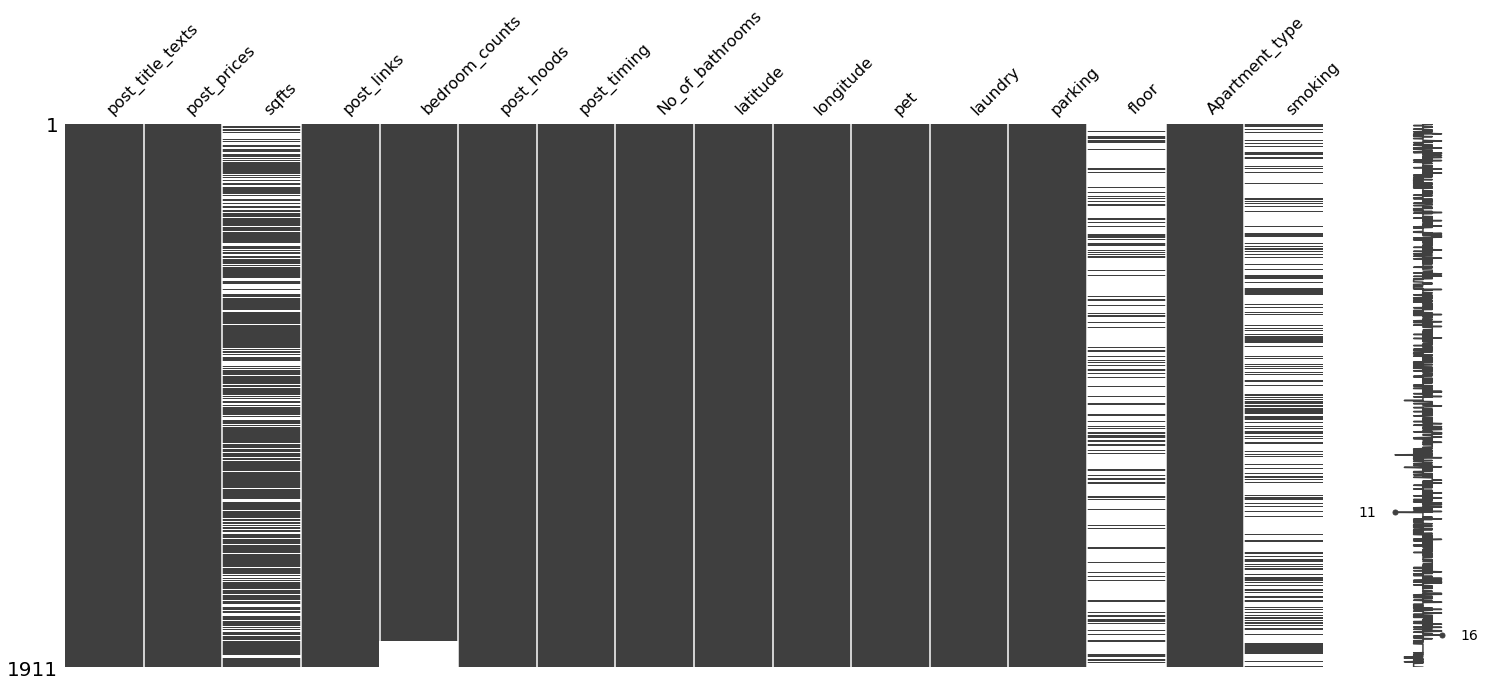

In [288]:
#the missing rows are random
import missingno as msno
msno.matrix(df_philly_sort)

In [289]:
df_philly.groupby(['bedroom_counts','Apartment_type'])['sqfts'].mean()

bedroom_counts  Apartment_type
0.0             multi              444.976190
1.0             double            1100.000000
                multi              859.334507
                single            2696.000000
2.0             double            1250.000000
                multi             1077.385776
                single            1396.934783
3.0             multi             1350.610390
                single            1543.433962
4.0             double            3305.000000
                multi             1839.833333
                single            1931.400000
5.0             multi             1412.900000
                single            4500.000000
Name: sqfts, dtype: float64

In [290]:
missing_area['bedroom_counts'].value_counts()

1.0    227
2.0    173
3.0     57
0.0     49
5.0      8
4.0      8
Name: bedroom_counts, dtype: int64

In [291]:
#we can clearly see as the bedroom increases the average price is increasing so is the square foot
print(df_philly.groupby('bedroom_counts')['post_prices'].mean())
df_philly.groupby(['bedroom_counts'])['sqfts'].mean()

bedroom_counts
0.0    1171.472527
1.0    1428.099379
2.0    1809.656934
3.0    2063.657754
4.0    2343.129032
5.0    3317.368421
Name: post_prices, dtype: float64


bedroom_counts
0.0     444.976190
1.0     888.349481
2.0    1106.769531
3.0    1429.223077
4.0    1943.347826
5.0    1693.545455
Name: sqfts, dtype: float64

In [292]:
#fill with average of the respective bedrooms
df_philly['sqfts'] = df_philly['sqfts'].fillna(df_philly.groupby(['bedroom_counts', 'Apartment_type'])['sqfts'].transform('mean'))

In [293]:
df_york['sqfts'] = df_york['sqfts'].fillna(df_york.groupby(['bedroom_counts', 'Apartment_type'])['sqfts'].transform('mean'))

In [294]:
df_york_sort = df_york.sort_values(by = 'bedroom_counts')

In [295]:
missing_area_york = df_york[df_york['sqfts'].isna()]
complete_area_york = df_york[~df_york['sqfts'].isna()]

In [296]:
 missing_area_york

,post_title_texts,post_prices,sqfts,post_links,bedroom_counts,post_hoods,post_timing,No_of_bathrooms,latitude,longitude,pet,laundry,parking,floor,Apartment_type,smoking
4,LUX BUILDING: STU - ROOFTOP - SCREENING RM - S...,1903.0,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,NaN,(Financial District),2021-02-18 16:42,1.0,40.705600,-74.008300,both pets,on site,no,NaN,multi,NaN
7,GOOD AMENITY RICH: LUX BUILDING - ROOFTOP - SC...,1938.0,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,NaN,(Financial District),2021-02-18 16:34,1.0,40.705600,-74.008300,no pet,on site,no,NaN,multi,NaN
92,"Humongous LOFT in GLOVEMAN FACTORY, LAUNDRY, ...",3550.0,NaN,https://newyork.craigslist.org/brk/apa/d/brook...,NaN,(Williamsburg/ L Graham),2021-02-18 13:52,1.0,40.712378,-73.944032,both pets,on site,no,wood,multi,NaN
176,Apartment for rent,1400.0,NaN,https://newyork.craigslist.org/lgi/apa/d/frank...,NaN,(Franklin Square),2021-02-18 11:57,1.0,40.701000,-73.675800,no pet,on site,no,NaN,multi,no smoking
317,7 Bedroom 3 Bathroom Bushwick Duplex Loft 2000...,4500.0,NaN,https://newyork.craigslist.org/brk/apa/d/brook...,7.0,(Bushwick),2021-02-18 00:20,3.0,40.688050,-73.918800,both pets,on site,no,wood,multi,NaN
451,1 BEDROOM DUPLEX APARTMENT IN PRIME CLINTON HI...,2150.0,NaN,https://newyork.craigslist.org/brk/apa/d/brook...,1.0,(CLINTON HILL),2021-02-17 16:46,1.5,40.701200,-73.943600,both pets,in unit,no,NaN,double,NaN
491,huuuuuuuge,2275.0,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,NaN,(West Village),2021-02-17 15:32,1.0,40.737738,-73.992888,both pets,no laundry,no,NaN,multi,NaN
494,Huuuuuuuuge and sunny,1925.0,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,NaN,(Chelsea),2021-02-17 15:30,1.0,40.744290,-73.998985,both pets,no laundry,no,NaN,multi,NaN
677,Gorgeous apartment in Turtle Bay !,1788.0,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,NaN,(Midtown East),2021-02-17 12:11,1.0,40.751700,-73.970700,no pet,on site,no,wood,multi,NaN
729,Rent Stabilized Apartment- Best location!,2300.0,NaN,https://newyork.craigslist.org/mnh/apa/d/new-y...,NaN,(Greenwich Village),2021-02-17 11:21,1.0,40.725500,-73.998300,cats,no laundry,no,wood,multi,NaN


In [297]:
df_york.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2520 entries, 0 to 2924
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_title_texts  2520 non-null   object 
 1   post_prices       2380 non-null   float64
 2   sqfts             2480 non-null   float64
 3   post_links        2520 non-null   object 
 4   bedroom_counts    2467 non-null   float64
 5   post_hoods        2520 non-null   object 
 6   post_timing       2520 non-null   object 
 7   No_of_bathrooms   2520 non-null   float64
 8   latitude          2520 non-null   float64
 9   longitude         2520 non-null   float64
 10  pet               2520 non-null   object 
 11  laundry           2520 non-null   object 
 12  parking           2520 non-null   object 
 13  floor             1012 non-null   object 
 14  Apartment_type    2520 non-null   object 
 15  smoking           360 non-null    object 
dtypes: float64(6), object(10)
memory usage: 33

<AxesSubplot:>

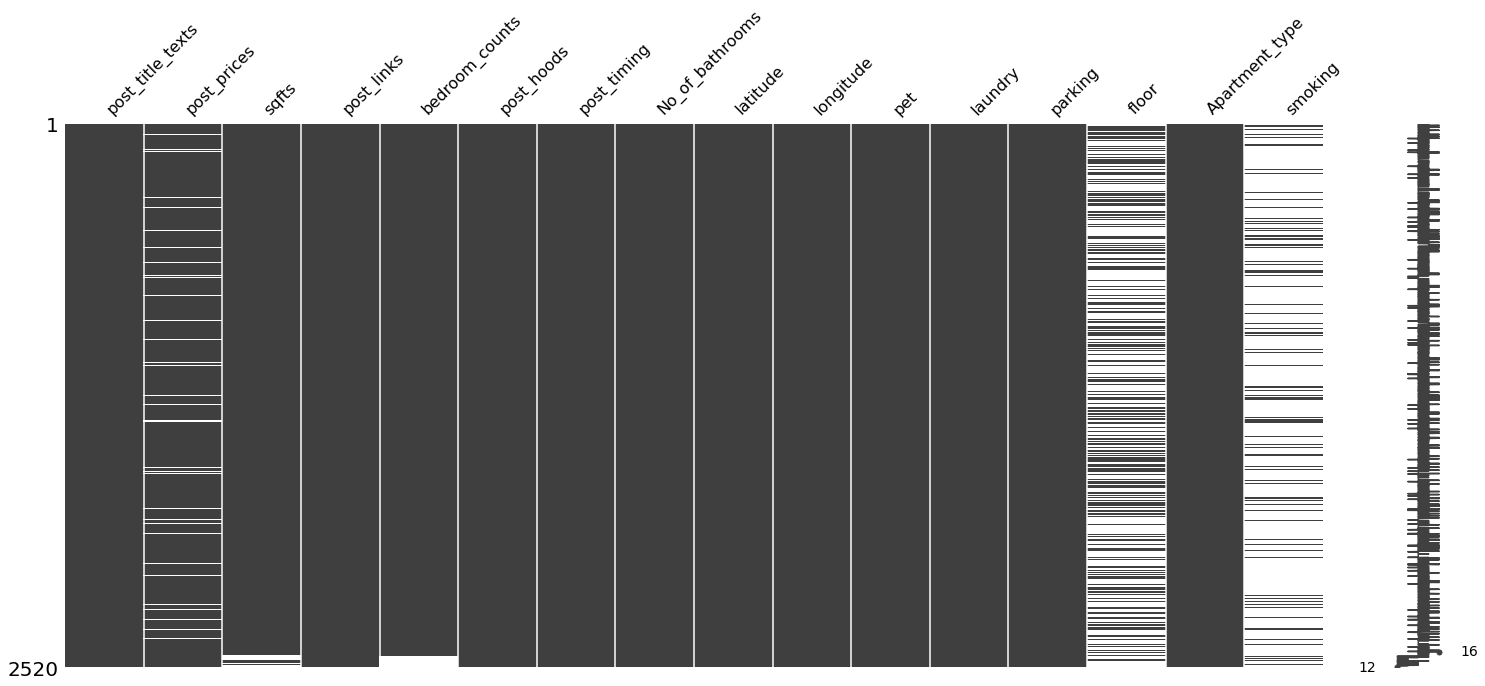

In [298]:
#the missing rows are random
import missingno as msno
msno.matrix(df_york_sort)

### missing on the latitude and longitude

In [299]:
#There are four rows in philly with missing latitude and longitude
df_philly.loc[df_philly['latitude'].isna(), ['latitude', 'post_title_texts', 'post_hoods']]

,latitude,post_title_texts,post_hoods
919,NaN,TEMPLE - Several To Choose From w/Security-All...,(Temple - Main Campus 1528 17th)
1765,NaN,1004 S. Chadwick St- Beautifully Renovated 2 B...,(Graduate Hospital)
2007,NaN,"W Master St, Fantastic 2 BR 2 BA For Rent!","(Philadelphia, PA)"
2101,NaN,Absolutely Charming Single Level Brick & Sidin...,(Chambersburg)


In [300]:
#replace the latitude and longitude by matching the post_hoods
print(df_philly[df_philly['post_hoods'].str.contains('(Temple - Main Campus|1528)')])
df_philly.loc[919, ['latitude', 'longitude']] = 39.9811, -75.174

                                      post_title_texts  post_prices  \
919  TEMPLE - Several To Choose From w/Security-All...         1000   
920  TEMPLE-2 Bdrm Apt. w/Huge Living &Bdrms,Free W...         1000   

           sqfts                                         post_links  \
919  1077.385776  https://philadelphia.craigslist.org/apa/d/temp...   
920  1077.385776  https://philadelphia.craigslist.org/apa/d/phil...   

     bedroom_counts                          post_hoods       post_timing  \
919             2.0    (Temple - Main Campus 1528 17th)  2021-02-18 00:08   
920             2.0   (Temple -Main Campus/1528 N.17th)  2021-02-18 00:08   

     No_of_bathrooms  latitude  longitude     pet  laundry parking floor  \
919              1.0       NaN        NaN  no pet  on site      no   NaN   
920              1.0   39.9811    -75.174    cats  on site      no   NaN   

    Apartment_type smoking  
919          multi     NaN  
920          multi     NaN  


/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [301]:
print(df_philly[df_philly['post_hoods'].str.contains('(Graduate Hospital|Chadwick)')])
df_philly.loc[1765, ['latitude', 'longitude']] = 39.945414, -75.179732

                                       post_title_texts  post_prices  \
57     Charming 2 Bedroom property in Graduate Hospital         1900   
64    PRICE IMPROVEMENT! Updated Cozy 1BR W/ Private...         1100   
72       Sunny, Spacious, Stylish, Walkable, A True Gem         1905   
177   Sunny, Spacious, Stylish, Great Location, A Tr...         2005   
477   Prime Location, spacious sunny units, walkable...         1905   
505   Well Known Location! Awesome 1BD Easy Highway ...         1295   
961   Unbeatable Location! Terrific 1BD with Easy Ac...         1295   
1356  Prime location, sunny spacious units, walkable...         2840   
1531   Business Center, Surface Parking, Fitness Center         1865   
1723               Sunny, stylish, spacious, a true gem         1835   
1765  1004 S. Chadwick St- Beautifully Renovated 2 B...         2060   
1775  2116 South St, Unit 3- Bi-level Apt Right on S...         1395   
1778  619 S. 19th Street Unit 2- Spacious Bi-level w...         

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [302]:
print(df_philly[df_philly['post_hoods'].str.contains('Chamesburg')])
#There were no matching post_hoods so we will drop this row

Empty DataFrame
Columns: [post_title_texts, post_prices, sqfts, post_links, bedroom_counts, post_hoods, post_timing, No_of_bathrooms, latitude, longitude, pet, laundry, parking, floor, Apartment_type, smoking]
Index: []


# Outliers in Price

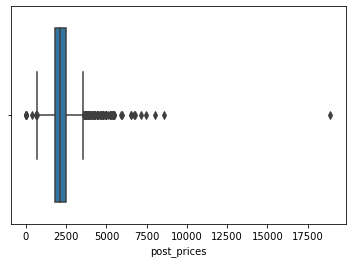

In [303]:
import seaborn as sns
#Newyork boxplot
ax = sns.boxplot(x=df_york["post_prices"])

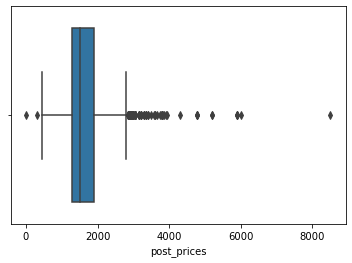

In [304]:
#Philly price box plot
ax = sns.boxplot(x=df_philly["post_prices"])

In [305]:
#remove one extreme value for philly
print(df_philly[df_philly['post_prices']>6000])
df_philly = df_philly[df_philly['post_prices']<6000]

                                       post_title_texts  post_prices   sqfts  \
2171  5 BED 5.2 BATHS 2 CAR GAR. SOCIETY HILL T. HOU...         8500  4500.0   

                                             post_links  bedroom_counts  \
2171  https://philadelphia.craigslist.org/apa/d/phil...             5.0   

           post_hoods       post_timing  No_of_bathrooms  latitude  longitude  \
2171   (SOCIETY HILL)  2021-02-16 20:57              5.0   39.9474   -75.1473   

         pet  laundry     parking floor Apartment_type smoking  
2171  no pet  in unit  proctected   NaN         single     NaN  


In [306]:
#observe one extreme outlier
df_york[df_york['post_prices']>17500]

,post_title_texts,post_prices,sqfts,post_links,bedroom_counts,post_hoods,post_timing,No_of_bathrooms,latitude,longitude,pet,laundry,parking,floor,Apartment_type,smoking
167,"Luxury 10,000 sq ft Colonial Estate in Sterlin...",18900.0,10000.0,https://newyork.craigslist.org/wch/apa/d/harri...,5.0,(Harrison),2021-02-18 12:13,6.0,40.98403,-73.733941,no pet,on site,proctected,NaN,single,NaN


In [307]:
#remove one extreme value from newyork listing
df_york = df_york[df_york['post_prices']<17500]

Text(0.5, 1.0, 'histogram for post price newyork')

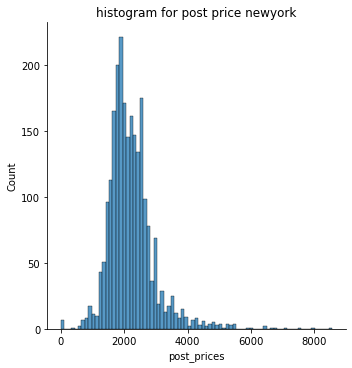

In [308]:
#make a histogram of the post_prices
ax = sns.displot(df_york['post_prices'])
plt.title("histogram for post price newyork")

Text(0.5, 1.0, 'histogram for post_price philly')

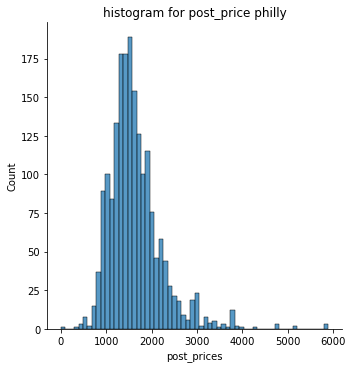

In [309]:
#make a histogram of the post_prices for philly
ax = sns.displot(df_philly['post_prices'])
plt.title('histogram for post_price philly')

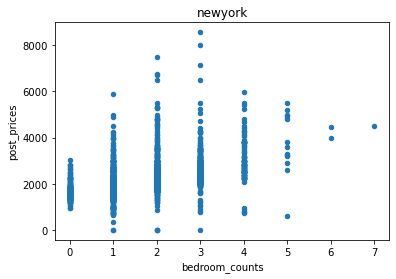

In [310]:
df_york.plot(x='bedroom_counts', y='post_prices', kind='scatter', title = 'newyork');

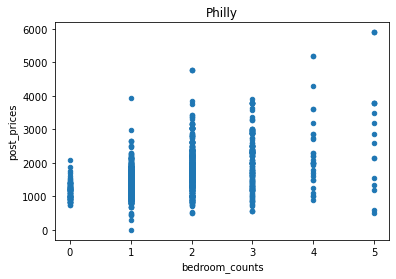

In [311]:
df_philly.plot(x='bedroom_counts', y='post_prices', kind='scatter', title = 'Philly');

### we can clearly see some housing price are near to the $0, we need to take care of them

In [312]:
#There is price in the post_title_texts for five of the apartment with price of $1 and $2 
#one apartment has price $0 
#it's written studio in text but the number of bedroom is 1 for studio room 
df_york[df_york['post_prices']<500][['post_title_texts', 'post_prices', 'bedroom_counts']]

,post_title_texts,post_prices,bedroom_counts
76,大學點海景一房/兩房一廳出租Sea View College Point 1BR/2BR f...,0.0,2.0
288,Nice studio apartment,350.0,1.0
2359,BEDSTUY BUILDING FOR SALE! MOTIVATED SELLER!,0.0,NaN
2811,"$1,6oo 1Bed 1Bath (2-Units!) w/Backyard+RearPorch",1.0,1.0
2849,"$1,7oo 1Bed 1Bath LOFT w/Rooftop",1.0,1.0
2854,"$2,1oo FLEX 3Bed/2Bed-1Bath 1st Floor w/Garage",2.0,2.0
2857,"$2,3oo 2BR w/2Baths+Elevator+Laundry+2Rooftops...",2.0,2.0
2859,"$2,4oo 3Bed 1Bath off Steinway St",2.0,3.0


In [313]:
#also we can see the last '00' is written with 'oo' so it is like difficult to extrac
#There are just five rows so it's not necessary to create any funciton to replace them i did manually
df_york.loc[2811, 'post_prices'] = 1600
df_york.loc[2849, 'post_prices'] = 1700
df_york.loc[2854, 'post_prices'] = 2100
df_york.loc[2857, 'post_prices'] = 2300
df_york.loc[2859, 'post_prices'] = 2400

In [314]:
#Replacing one $0 post price by mean of bedrooms and Apartment type
df_york.loc[76, 'post_prices'] = df_york.groupby(['bedroom_counts', 'Apartment_type'])['post_prices'].mean()[2][2]

In [315]:
#There is just one post with price 0 # for philly
df_philly[df_philly['post_prices']<500][['post_title_texts', 'post_prices', 'bedroom_counts', 'Apartment_type']]

,post_title_texts,post_prices,bedroom_counts,Apartment_type
166,"Rad house in West Philly seeking roommate, ACA...",300,1.0,multi
544,Newly Renovated Apartments,0,1.0,multi
1559,Affordable Senior Living!!!,460,1.0,multi
1568,Immediate Move In For 1 Bedroom / 1 Bathroom,490,1.0,multi
2162,ROOM FOR RENT in Frencisville,450,1.0,single


In [316]:
#Replacing one $0 post price by mean of bedrooms and Apartment type 
df_philly.loc[544, 'post_prices'] = df_philly.groupby(['bedroom_counts', 'Apartment_type'])['post_prices'].mean()[1][1]

### Replace the studio with 1bedroom to 0 bedroom

In [317]:
df_york['studio_bed_1'] = df_york.loc[df_york['bedroom_counts']== 1, 'post_title_texts'].str.find('studio')

In [318]:
df_philly['studio_bed_1'] = df_philly.loc[df_philly['bedroom_counts']== 1, 'post_title_texts'].str.find('studio')

In [319]:
df_philly['studio_bed_1'].value_counts()

-1.0     799
 19.0      1
 11.0      1
 16.0      1
 21.0      1
 6.0       1
Name: studio_bed_1, dtype: int64

In [320]:
df_york['studio_bed_1'].value_counts()

-1.0    798
 0.0      2
 5.0      1
Name: studio_bed_1, dtype: int64

In [321]:
print(df_philly.loc[df_philly['studio_bed_1']== 6.0, ['post_title_texts','bedroom_counts']])
print(df_philly.loc[df_philly['studio_bed_1']==21.0,['post_title_texts','bedroom_counts']])
print(df_philly.loc[df_philly['studio_bed_1']==19.0,['post_title_texts','bedroom_counts']])
print(df_philly.loc[df_philly['studio_bed_1']==11.0,['post_title_texts','bedroom_counts']])
print(df_philly.loc[df_philly['studio_bed_1']==16.0,['post_title_texts','bedroom_counts']])

     post_title_texts  bedroom_counts
1409     Great studio             1.0
                           post_title_texts  bedroom_counts
1345  Fairmount/Art Museum studio with loft             1.0
                                       post_title_texts  bedroom_counts
2310  Soaking tubs, Yoga studio, Elevators, Grilling...             1.0
                             post_title_texts  bedroom_counts
1352  Convenient studio in heart of Fairmount             1.0
                                       post_title_texts  bedroom_counts
2159  Quaint Narberth studio, high floor w/balcony n...             1.0


In [322]:
print(df_york.loc[df_york['studio_bed_1']==0.0, ['post_title_texts','bedroom_counts']])
print(df_york.loc[df_york['studio_bed_1']==5.0, ['post_title_texts', 'bedroom_counts']])

                                       post_title_texts  bedroom_counts
2477   studio all included rent stabilization 1mothfree             1.0
2479  studio all included rent stabilization 1month ...             1.0
          post_title_texts  bedroom_counts
288  Nice studio apartment             1.0


In [323]:
#There are just three replaceing manually with 0 
df_york.loc[2477, 'bedroom_counts'] = 0
df_york.loc[2479, 'bedroom_counts'] = 0
df_york.loc[288, 'bedroom_counts'] = 0

In [324]:
#Manually replacing the bedroom to 0
df_philly.loc[1409, 'bedroom_counts'] = 0
df_philly.loc[1345, 'bedroom_counts'] = 0
df_philly.loc[2310, 'bedroom_counts'] = 0
df_philly.loc[1352, 'bedroom_counts'] = 0
df_philly.loc[2159, 'bedroom_counts'] = 0

## There are list of apartments which are highly unusal in sqfts

In [325]:
df_philly[df_philly['sqfts']<96]

,post_title_texts,post_prices,sqfts,post_links,bedroom_counts,post_hoods,post_timing,No_of_bathrooms,latitude,longitude,pet,laundry,parking,floor,Apartment_type,smoking,studio_bed_1
248,Beautiful Exton Community,1634.0,2.0,https://philadelphia.craigslist.org/apa/d/exto...,2.0,(Exton PA),2021-02-18 12:42,2.0,40.0468,-75.6432,both pets,in unit,off-street,NaN,multi,NaN,NaN


In [326]:
len(df_philly[df_philly['sqfts']>5000])

8

In [327]:
df_philly.loc[df_philly['sqfts']<96, 'sqfts'] =  df_philly.groupby(['bedroom_counts', 'Apartment_type'])['sqfts'].transform('mean')

In [328]:
df_philly.loc[df_philly['sqfts']>5000, 'sqfts'] = df_philly.groupby(['bedroom_counts', 'Apartment_type'])['sqfts'].transform('mean')

## Dropping the columns with more than 50% missing values and unwanted columns 

In [329]:
#drop the we created colum studio_bed_1
df_york= df_york.drop(columns = ['studio_bed_1','floor','smoking'], axis = 1)
df_philly = df_philly.drop(columns = ['studio_bed_1','floor', 'smoking'], axis = 1)

### drop the missing values  of bedrooms counts

In [330]:
#drop the missing bedroom rows
df_york = df_york.dropna(subset = ['bedroom_counts'])
df_philly = df_philly.dropna(subset = ['bedroom_counts', 'latitude', 'longitude'])

In [331]:
df_philly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1814 entries, 0 to 2452
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_title_texts  1814 non-null   object 
 1   post_prices       1814 non-null   float64
 2   sqfts             1814 non-null   float64
 3   post_links        1814 non-null   object 
 4   bedroom_counts    1814 non-null   float64
 5   post_hoods        1814 non-null   object 
 6   post_timing       1814 non-null   object 
 7   No_of_bathrooms   1814 non-null   float64
 8   latitude          1814 non-null   float64
 9   longitude         1814 non-null   float64
 10  pet               1814 non-null   object 
 11  laundry           1814 non-null   object 
 12  parking           1814 non-null   object 
 13  Apartment_type    1814 non-null   object 
dtypes: float64(6), object(8)
memory usage: 212.6+ KB


In [332]:
df_york.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2924
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   post_title_texts  2326 non-null   object 
 1   post_prices       2326 non-null   float64
 2   sqfts             2322 non-null   float64
 3   post_links        2326 non-null   object 
 4   bedroom_counts    2326 non-null   float64
 5   post_hoods        2326 non-null   object 
 6   post_timing       2326 non-null   object 
 7   No_of_bathrooms   2326 non-null   float64
 8   latitude          2326 non-null   float64
 9   longitude         2326 non-null   float64
 10  pet               2326 non-null   object 
 11  laundry           2326 non-null   object 
 12  parking           2326 non-null   object 
 13  Apartment_type    2326 non-null   object 
dtypes: float64(6), object(8)
memory usage: 272.6+ KB


In [333]:
df_york[df_york['sqfts'].isna()]

,post_title_texts,post_prices,sqfts,post_links,bedroom_counts,post_hoods,post_timing,No_of_bathrooms,latitude,longitude,pet,laundry,parking,Apartment_type
317,7 Bedroom 3 Bathroom Bushwick Duplex Loft 2000...,4500.0,NaN,https://newyork.craigslist.org/brk/apa/d/brook...,7.0,(Bushwick),2021-02-18 00:20,3.0,40.688050,-73.918800,both pets,on site,no,multi
451,1 BEDROOM DUPLEX APARTMENT IN PRIME CLINTON HI...,2150.0,NaN,https://newyork.craigslist.org/brk/apa/d/brook...,1.0,(CLINTON HILL),2021-02-17 16:46,1.5,40.701200,-73.943600,both pets,in unit,no,double
1029,Super huge 6br/2.5bath triplex+private backyar...,4000.0,NaN,https://newyork.craigslist.org/brk/apa/d/brook...,6.0,(Bed Stuy @ Myrtle Ave JMZ+ Myrtle/WilloughbyG),2021-02-16 16:43,2.5,40.692317,-73.939898,both pets,on site,no,double
2016,1 BED DUPLEX APARTMENT WITH A PRIVATE BACKYARD...,2150.0,NaN,https://newyork.craigslist.org/brk/apa/d/brook...,1.0,(CLINTON HILL),2021-02-14 20:11,1.5,40.692400,-73.966600,both pets,in unit,no,double


In [334]:
df_york = df_york.dropna(subset = ['sqfts'])

In [335]:
df_york.to_csv('data/df_york_cleaned.csv')
df_philly.to_csv('data/df_philly_cleaned.csv')

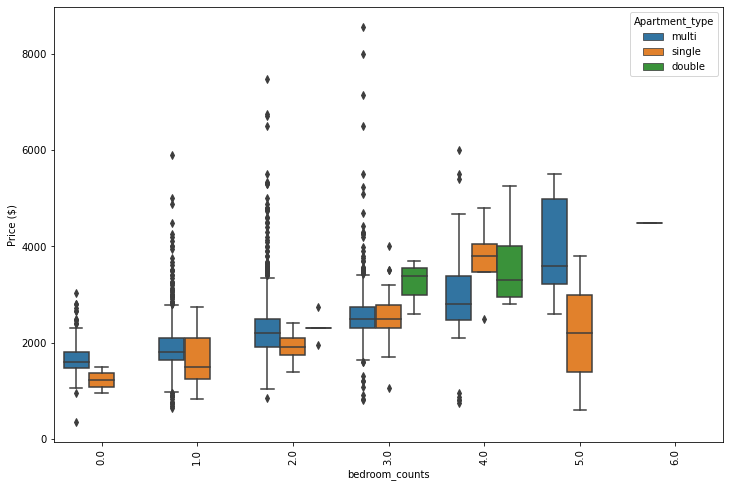

In [336]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='bedroom_counts', y='post_prices', hue='Apartment_type', data=df_york)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('bedroom_counts');

In [337]:
#We can see the huge outliers in average price for 1,2 and 3 bedrooms for multi
# But the inter quartile range is comparatively smaller than 4 and 5 bedroom

In [338]:
#we have 8 rows post price greater than 6000
df_york_gre = df_york[df_york['post_prices']>4000]

In [339]:
street_map = gpd.read_file('newyork_map/geo_export_1ed09a15-55c0-4cb3-b8d6-9f16c559cb62.shp')

In [340]:
# designate coordinate system
crs = {'init':"EPSG:4326"}

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


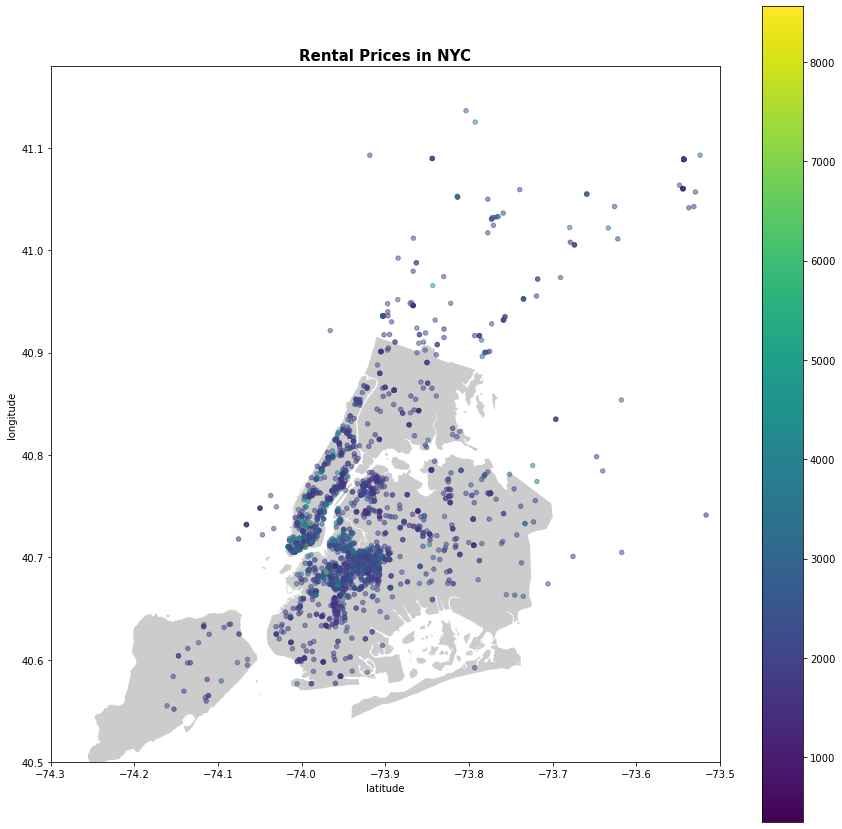

In [341]:
geometry = [Point(xy) for xy in zip(df_york['longitude'], df_york['latitude'])]
geo_df = gpd.GeoDataFrame(df_york,crs = crs,geometry = geometry)
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='post_prices',ax=ax,alpha=0.5, legend=True, markersize=20)
plt.title('Rental Prices in NYC', fontsize=15,fontweight='bold')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.xlim(-74.3,-73.5)
plt.ylim( 40.5,41.18)
plt.show()

/opt/anaconda3/envs/Geo_pandas37/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


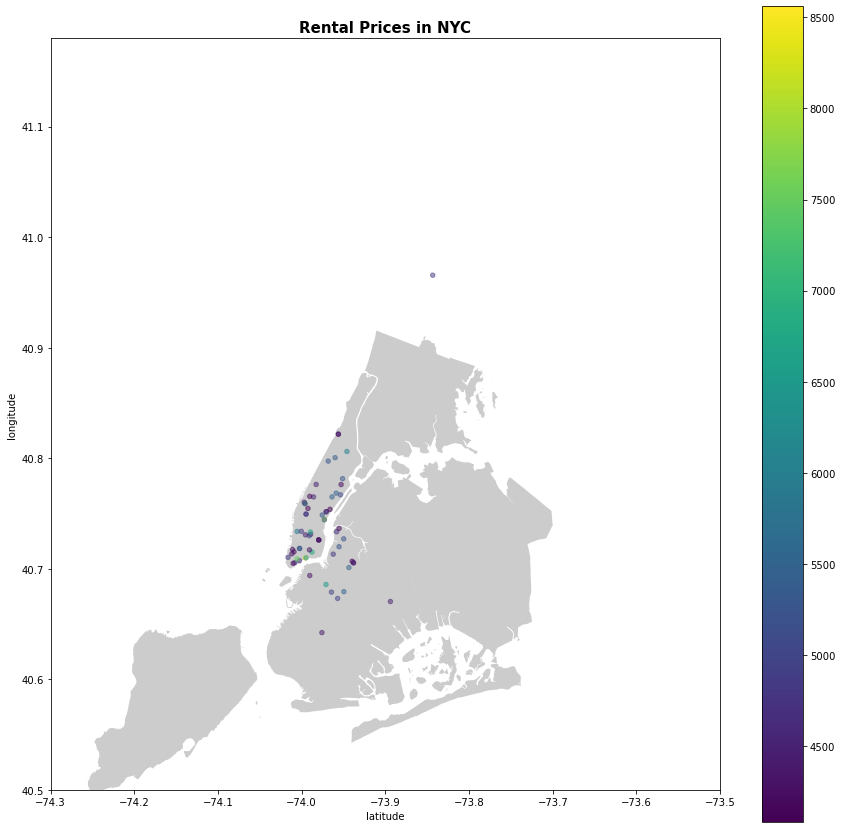

In [342]:
geometry = [Point(xy) for xy in zip(df_york_gre['longitude'], df_york_gre['latitude'])]
geo_df = gpd.GeoDataFrame(df_york_gre,crs = crs,geometry = geometry)
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')
geo_df.plot(column='post_prices',ax=ax,alpha=0.5, legend=True, markersize=20)
# add title to graph
plt.title('Rental Prices in NYC', fontsize=15,fontweight='bold')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.xlim(-74.3,-73.5)
plt.ylim( 40.5,41.18)
plt.show()